**Projeto C318 - Planos de Saúde**

Grupo: 

Camila de Cássia, 
Isadora Bello, 
Mariana V M Bassi e 
Matheus Chagas
       



In [1]:
#Instalar a biblioteca Seaborn, Plotly para plotar gráficos

#pip install seaborn
#pip install plotly

Importar as bibliotecas

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

Definir as URLs - Diretórios dos arquivos .csv a utilizar (dataset)

In [2]:
URL_ARQUIVO = "./bancodados/202012.csv"
URL_ARQUIVO_HISTORICO = "./bancodados/HISTORICO_PLANOS.csv"
URL_ARQUIVO_GEOGRAFICO = "./bancodados/geografia.csv"

Abrir o arquivo '202012.csv' com os dados dos valores comerciais de mensalidade dos Planos de Saúde de 2020

Exibir o dataset para verificar as variáveis de entrada existesntes

In [3]:
tabela_planos = pd.read_csv(URL_ARQUIVO, delimiter=';')
#tabela_planos.head() #5 primeiros dados

In [4]:
tabela_planos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56243460 entries, 0 to 56243459
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   CD_MUNICIPIO     int64 
 1   ID_PLANO         int64 
 2   CD_FAIXA_ETARIA  int64 
 3   VCM              object
dtypes: int64(3), object(1)
memory usage: 1.7+ GB


**Análise Inicial do Dataset**

CD_MUNICIPIO: identificação do município - int

ID_PLANO: identificação do plano - int

CD_FAIXA_ETARIA: faixa etária 1-10 - int

VCM: valor comercial da mensalidade - object

Total de Dados: 56.243.460

Substituir a vírgula por ponto na coluna do VCM e transformar para o tipo numérico ponto flutuante

In [5]:
tabela_planos['VCM'] = tabela_planos['VCM'].str.replace(',', '.').astype(float)

Carregar e abrir o banco de dados geográficos

In [6]:
tabela_geografica = pd.read_csv(URL_ARQUIVO_GEOGRAFICO, sep=";")

tabela_geografica_simplificada = tabela_geografica[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF', 'NM_REGIAO']]

#tabela_geografica_simplificada

In [7]:
tabela_geografica_simplificada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CD_MUNICIPIO  5570 non-null   int64 
 1   NM_MUNICIPIO  5570 non-null   object
 2   SG_UF         5570 non-null   object
 3   NM_REGIAO     5570 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.2+ KB


**Dataset Geografico**

NM_MUNICIPIO: nome do município

SG_UF: sigla do município

NM_REGIAO: nome da região

Nenhuma informação vazia

Total de dados: 5.570

Merge do dataset de planos com o dataset geográfico para identificar os locais de atuação de cada plano

In [8]:
planos = pd.merge(tabela_planos, tabela_geografica_simplificada, how='inner', on='CD_MUNICIPIO')

#planos

In [9]:
print(planos.isnull().sum())
print(planos['VCM'].isnull().sum())

CD_MUNICIPIO       0
ID_PLANO           0
CD_FAIXA_ETARIA    0
VCM                0
NM_MUNICIPIO       0
SG_UF              0
NM_REGIAO          0
dtype: int64
0


Carregar e abrir o dataset do histórico dos planos

In [10]:
tabela_historico = pd.read_csv(URL_ARQUIVO_HISTORICO, sep=",", low_memory=False)

tabela_historico_simplificado = tabela_historico[['ID_PLANO', 'DT_FIM_STATUS','DE_SITUACAO_PRINCIPAL']]

tabela_historico_simplificado.head()

,ID_PLANO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,1324729,11/10/2006,ATIVO
1,1324729,NaN,CANCELADO
2,1324732,11/10/2006,ATIVO
3,1324732,NaN,CANCELADO
4,1324735,11/10/2006,ATIVO


In [11]:
#Informações sobre o dataset
print(tabela_historico_simplificado.info())
print(tabela_historico_simplificado.DE_SITUACAO_PRINCIPAL.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316003 entries, 0 to 316002
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_PLANO               316003 non-null  int64 
 1   DT_FIM_STATUS          165716 non-null  object
 2   DE_SITUACAO_PRINCIPAL  316000 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.2+ MB
None
ATIVO                                 122668
ATIVO COM COMERCIALIZA��O SUSPENSA    108947
CANCELADO                              59918
TRANSFERIDO                            24467
Name: DE_SITUACAO_PRINCIPAL, dtype: int64


**Dataset Histórico**

DT_FIM_STATUS: data final para verificar status atual

DE_SITUACAO_PRINCIPAL: situação principal do plano 1-4 (Ativo, Ativo com comercialização suspensa, Cancelado ou Transferido)

Total de Dados: 316003

Dados inválidos: 3

Campos em branco da coluna DT_FIM_STATUS: 150.287 - nessa situação, o campo NaN significa o momento atual (data)

In [12]:
tabela_historico_simplificado.isnull().sum() #Verificando os campos em branco

vazios = tabela_historico_simplificado.DE_SITUACAO_PRINCIPAL.isnull() #Analisar os campos em branco e identificar os planos

print(tabela_historico_simplificado[vazios])

        ID_PLANO DT_FIM_STATUS DE_SITUACAO_PRINCIPAL
162516   1513693             2                   NaN
162517   1513694             2                   NaN
162518   1513695             2                   NaN


In [13]:
#Planos sem informações totais:
#1513693
#1513694
#1513695

#Verificar se esses planos constam no dataset base (tabela_planos)
tabela_1513693 = planos.loc[planos['ID_PLANO'] == 1513693]
print(tabela_1513693.info())
tabela_1513694 = planos.loc[planos['ID_PLANO'] == 1513694]
print(tabela_1513694.info())
tabela_1513695 = planos.loc[planos['ID_PLANO'] == 1513695]
print(tabela_1513695.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CD_MUNICIPIO     0 non-null      int64  
 1   ID_PLANO         0 non-null      int64  
 2   CD_FAIXA_ETARIA  0 non-null      int64  
 3   VCM              0 non-null      float64
 4   NM_MUNICIPIO     0 non-null      object 
 5   SG_UF            0 non-null      object 
 6   NM_REGIAO        0 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 0.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CD_MUNICIPIO     0 non-null      int64  
 1   ID_PLANO         0 non-null      int64  
 2   CD_FAIXA_ETARIA  0 non-null      int64  
 3   VCM              0 non-null      float64
 4   NM_MUNICIPIO     0 non-null      object 
 5   SG_UF

Verifica-se que os planos com campos inválidos não constam no dataset base (planos). Como o campo DT_FIM_STATUS desses planos
não é uma data (apresentada como object) e nem NaN (de interesse do projeto), não é necessário excluir essas linhas antes do próximo split.

In [14]:
#Filtrar os DT_FIM_STATUS com valor NaN
ativo = tabela_historico_simplificado.DT_FIM_STATUS.isna() #tipo booleano
#ativo
historico = tabela_historico_simplificado[ativo]
#historico

In [16]:
#Filtrar os planos ativos total
tabela_ativos = historico.loc[historico['DE_SITUACAO_PRINCIPAL'] == 'ATIVO']
#tabela_ativos

#Total de Planos Ativos
print(tabela_ativos.DE_SITUACAO_PRINCIPAL.value_counts())

ATIVO    25058
Name: DE_SITUACAO_PRINCIPAL, dtype: int64


In [18]:
#Merge dos planos ativos
planos_ativos = pd.merge(planos, tabela_ativos, how='left', on='ID_PLANO')
#planos_ativos


In [19]:
#Filtrar os planos ativos do dataset base
planos_ativos_2020 = planos_ativos.loc[planos_ativos['DE_SITUACAO_PRINCIPAL'] == 'ATIVO'] #4294595

#planos_ativos_2020
print(planos_ativos_2020.DE_SITUACAO_PRINCIPAL.value_counts())

ATIVO    42945950
Name: DE_SITUACAO_PRINCIPAL, dtype: int64


In [20]:
#Calcular o total de planos
len(planos_ativos_2020['ID_PLANO'].unique()) #11057

11057

In [24]:
#Analisar o VCM
d_geral = planos_ativos_2020['VCM'].describe()
d_geral

#Criar lista com a descrição
info_vcm_g = list(d_geral)
info_vcm_g.pop(0)
info_vcm_g

[972.2096526124114, 1024.7919600265645, 17.0, 391.08, 654.85, 1176.0, 29950.36]

In [25]:
#Gráfico da descrição do VCM geral
dic = {
    'index_d': ['mean','std','min','25%','50%','75%','max'],
    'valores': info_vcm_g
}

resultado = pd.DataFrame(dic)
fig = px.line(resultado, x='index_d', y = 'valores', markers=True)
fig.show()

**Analise do VCM geral**

A média do VCM é 972,2097 reais

VCM mínimo: 17 reais

VCM máximo: 29.950,36 reais

Desvio Padrão: 1.024,792 - alta dispersão em torno da média - dificulta a análise do VCM, indicando também que a análise sem separação pela faixa etária aumenta a incerteza do VCM

In [26]:
#Analisar os valores das faixas etarias e os respectivos desvios padrão
desvios = []
vcm_min = []
vcm_max = []
media = []

plt.figure(figsize=(10, 6))
for i in range (1,11):
    tabela = planos_ativos_2020[planos_ativos_2020['CD_FAIXA_ETARIA'] == i]
    d = tabela['VCM'].std()
    mi = tabela['VCM'].min()
    ma = tabela['VCM'].max()
    me = tabela['VCM'].mean()
    desvios.append(d)
    vcm_min.append(mi)
    vcm_max.append(ma)
    media.append(me)
    print('Faixa etaria', i)
    print(tabela['VCM'].describe())    

Faixa etaria 1
count    4.294595e+06
mean     3.989341e+02
std      2.974153e+02
min      1.700000e+01
25%      2.195600e+02
50%      3.015000e+02
75%      4.658900e+02
max      5.000000e+03
Name: VCM, dtype: float64
Faixa etaria 2
count    4.294595e+06
mean     4.940662e+02
std      3.816561e+02
min      1.953000e+01
25%      2.716300e+02
50%      3.690300e+02
75%      5.687500e+02
max      9.230350e+03
Name: VCM, dtype: float64
Faixa etaria 3
count    4.294595e+06
mean     5.785972e+02
std      4.347472e+02
min      2.150000e+01
25%      3.216400e+02
50%      4.337600e+02
75%      6.775900e+02
max      1.071279e+04
Name: VCM, dtype: float64
Faixa etaria 4
count    4.294595e+06
mean     6.493968e+02
std      4.863870e+02
min      2.257000e+01
25%      3.652900e+02
50%      4.844100e+02
75%      7.628900e+02
max      1.126557e+04
Name: VCM, dtype: float64
Faixa etaria 5
count    4.294595e+06
mean     7.095753e+02
std      5.243961e+02
min      2.597000e+01
25%      4.039200e+02
50%    

<Figure size 1000x600 with 0 Axes>

In [28]:
dic = {
   'faixa_etaria': [1,2,3,4,5,6,7,8,9,10],
    'std': desvios,
    'min': vcm_min,
    'max': vcm_max,
    'media': media
    
}

resultado = pd.DataFrame(dic)
resultado

,faixa_etaria,std,min,max,media
0,1,297.415279,17.00,5000.00,398.934066
1,2,381.656079,19.53,9230.35,494.066195
2,3,434.747229,21.50,10712.79,578.597221
3,4,486.387010,22.57,11265.57,649.396786
4,5,524.396117,25.97,12268.18,709.575318
5,6,582.931116,31.16,13758.79,793.836171
6,7,742.614143,41.77,18645.91,992.119647
7,8,916.452105,51.69,24821.43,1219.280354
8,9,1233.007015,51.68,26655.72,1536.045655
9,10,1766.435373,69.90,29950.36,2350.245113


In [47]:
#Evolução em relação a faixa-etaria
fig = px.scatter(resultado, x="faixa_etaria", y="std", animation_frame="faixa_etaria",
           size="media", color="std",
           log_x=False, size_max=45,range_x=[1,10], range_y=[0,2500])

fig.show()

In [65]:
fig = px.scatter(resultado, x="faixa_etaria", y="std",
           size="media", color="std",
           log_x=False, size_max=45,range_x=[1,10], range_y=[0,2500])
fig.show()

In [64]:
import plotly.graph_objects as go

faixa = [1,2,3,4,5,6,7,8,9,10]
# Add traces
fig = go.Figure(layout=dict(title=dict(text="Comparacao por Faixa Etaria")))
fig.add_trace(go.Scatter(x=faixa, y=desvios, mode='markers', name='Desvios Padrao'))
fig.add_trace(go.Scatter(x=faixa, y=vcm_min, mode='markers', name='Minimos'))
fig.add_trace(go.Scatter(x=faixa, y= vcm_max, mode='markers', name='Maximos'))
fig.add_trace(go.Scatter(x=faixa, y= media, mode='markers', name='Medias'))

fig.show()

In [64]:
#VCM minimo
dic = {
   'faixa_etaria': [1,2,3,4,5,6,7,8,9,10],
    'valores': vcm_min
}

resultado = pd.DataFrame(dic)
fig = px.line(resultado, x='faixa_etaria', y = 'valores', markers=True)
fig.show()

In [66]:
#VCM maximo
dic = {
   'faixa_etaria': [1,2,3,4,5,6,7,8,9,10],
    'valores': vcm_max
}

resultado = pd.DataFrame(dic)
fig = px.line(resultado, x='faixa_etaria', y = 'valores', markers=True)
fig.show()

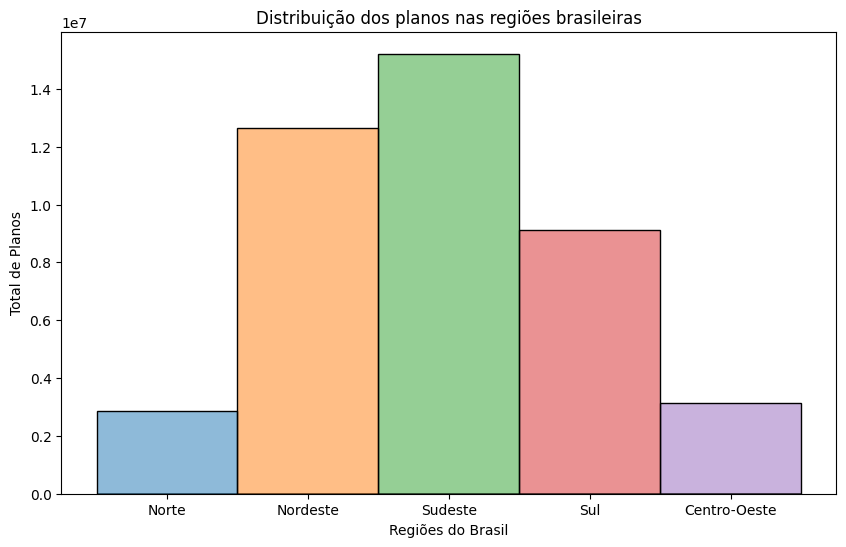

In [26]:
#Analisar as regiões

plt.figure(figsize=(10, 6))
sns.histplot(data=planos_ativos_2020, x='NM_REGIAO', hue="NM_REGIAO", legend=False, bins=30)
plt.title('Distribuição dos planos nas regiões brasileiras')
plt.xlabel('Regiões do Brasil')
plt.ylabel('Total de Planos')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42945950 entries, 0 to 56243419
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CD_MUNICIPIO           int64  
 1   ID_PLANO               int64  
 2   CD_FAIXA_ETARIA        int64  
 3   VCM                    float64
 4   NM_MUNICIPIO           object 
 5   SG_UF                  object 
 6   NM_REGIAO              object 
 7   DT_FIM_STATUS          object 
 8   DE_SITUACAO_PRINCIPAL  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ GB
None


MemoryError: Unable to allocate 328. MiB for an array with shape (42945950,) and data type int64

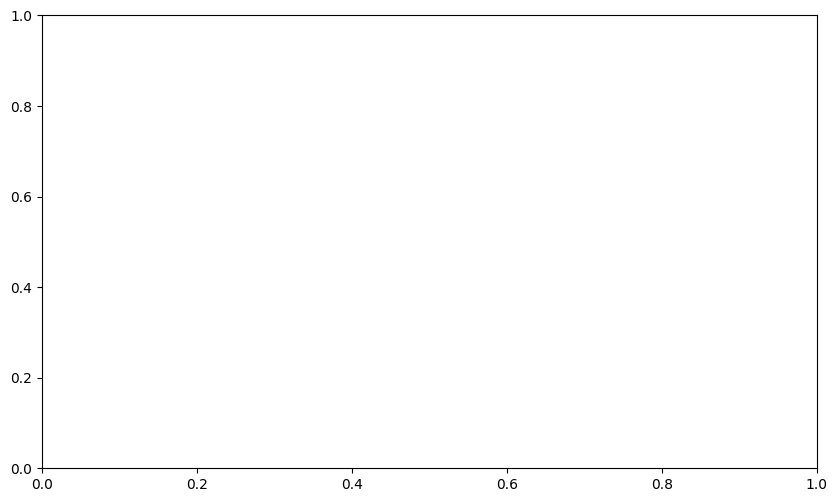

In [31]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
sns.histplot(data=planos_ativos_2020, x="VCM", hue="NM_REGIAO", bins=30, multiple="dodge", kde=True)
plt.title('Distribuição Valores Pagos x Região')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Número de Planos')
#plt.xticks([1000.00, 2000.00, 3000.00, 4000.00, 5000.00, 6000.00, 7000.00, 8000.00, 9000.00, 10000.00])
 
# plt.subplot(3, 1, 2)
# sns.histplot(data=planos_ativos_2020, x="VCM", y="NM_REGIAO", hue="NM_REGIAO", bins=30, legend=False)
# plt.title('Distribuição Valores Pagos x Região')
# plt.xlabel('Valor da Mensalidade')
# plt.ylabel('Região')
 
# plt.subplot(3, 1, 3)
# sns.histplot(data=planos_ativos_2020, y="VCM", x="SG_UF", hue="SG_UF", bins=30, legend=False)
# plt.title('Distribuição Valores Pagos x Estado')
# plt.xlabel('Estado')
# plt.ylabel('Valor da Mensalidade')
plt.show()

SP    735228
MG    629399
RS    397425
PR    305619
BA    297897
SC    207967
GO    172575
PB    159550
MA    150688
PI    143681
PE    139146
CE    135855
RN    115853
RJ    101478
PA    100748
MT     89402
TO     77404
AL     72477
ES     55493
MS     50988
SE     48167
AM     42708
RO     33249
AC     12279
AP     10077
RR      8352
DF       890
Name: SG_UF, dtype: int64


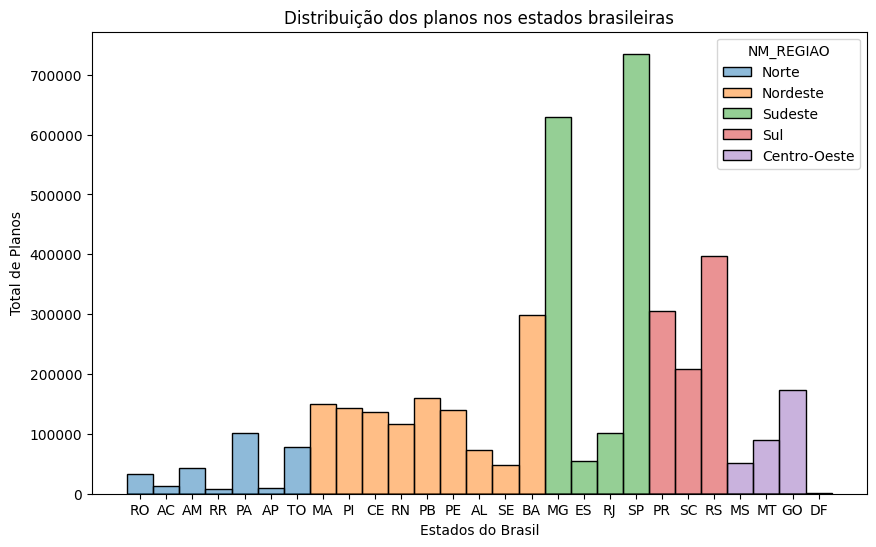

In [111]:
#Analise dos estados
faixa_1 = planos_ativos_2020[planos_ativos_2020['CD_FAIXA_ETARIA'] == 1]
print(faixa_1['SG_UF'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(data=planos_1, x='SG_UF', hue="NM_REGIAO", legend=True, bins=30)
plt.title('Distribuição dos planos nos estados brasileiras')
plt.xlabel('Estados do Brasil')
plt.ylabel('Total de Planos')
plt.show()


In [113]:
print(faixa_1['NM_MUNICIPIO'].value_counts())

Bom Jesus        3542
São Domingos     3457
Planalto         3386
Vera Cruz        3361
São Francisco    3195
                 ... 
Xambioá           530
Wanderlândia      529
Tupiratins        528
Tocantínia        527
Tupirama          526
Name: NM_MUNICIPIO, Length: 5297, dtype: int64


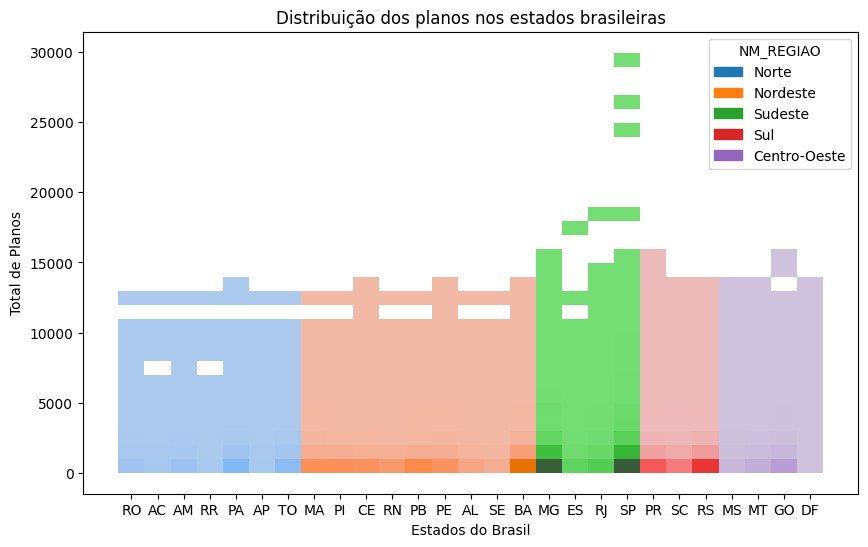

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(data=planos_ativos_2020, x='SG_UF', y = 'VCM', hue="NM_REGIAO", legend=True, bins=30)
plt.title('Distribuição dos planos nos estados brasileiras')
plt.xlabel('Estados do Brasil')
plt.ylabel('Total de Planos')
plt.show()


In [32]:
DATA_BASE = 2021

#tabela_merge_historico = pd.merge(tabela_merge, tabela_historico_simplificado, how='left', on='ID_PLANO')

#tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DT_FIM_STATUS'].str.slice(6).astype(int) < DATA_BASE]

#tabela_merge_historico['VCM'] = tabela_merge_historico['VCM'].str.replace(',', '.').astype(float)

#tabela_merge_historico
tabela_merge_historico = pd.merge(tabela, tabela_historico_simplificado, how='left', on='ID_PLANO')
#tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DT_FIM_STATUS'].str.slice(6).astype(int) < DATA_BASE]
tabela_merge_historico

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
1,110001,1329163,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
2,110001,1329193,1,746.44,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
3,110001,1329198,1,703.16,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
4,110001,1329553,1,282.34,Alta Floresta D'Oeste,RO,Norte,11/08/2014,ATIVO
...,...,...,...,...,...,...,...,...,...
12209142,530010,18337375,1,149.88,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
12209143,530010,18337386,1,243.58,Brasília,DF,Centro-Oeste,19/01/2023,ATIVO
12209144,530010,18337386,1,243.58,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
12209145,530010,18337397,1,194.86,Brasília,DF,Centro-Oeste,19/01/2023,ATIVO


In [20]:
resultado = tabela['ID_PLANO'].value_counts()
planos = tabela['ID_PLANO']
planos
#list(resultado)

0            1328693
10           1329163
20           1329193
30           1329198
40           1329553
              ...   
56243410    18335344
56243420    18337364
56243430    18337375
56243440    18337386
56243450    18337397
Name: ID_PLANO, Length: 5624346, dtype: int64

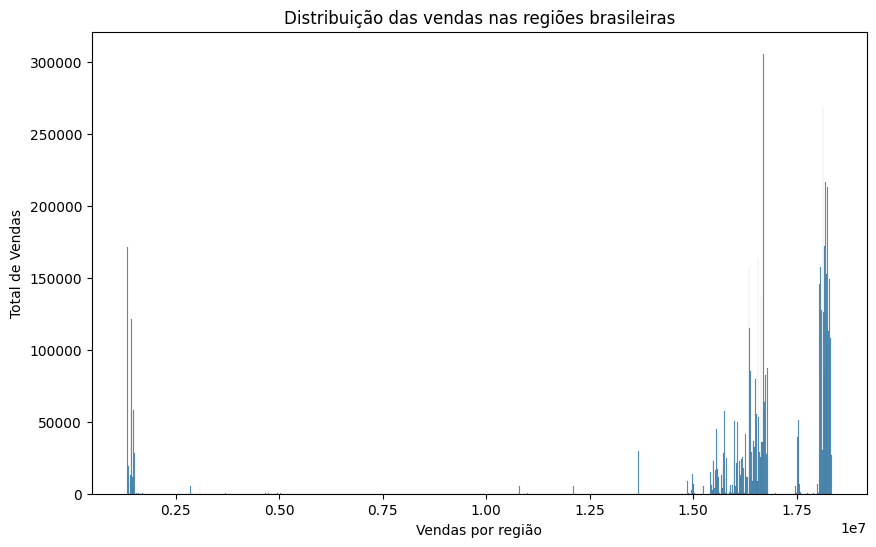

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tabela, x='ID_PLANO', legend=True, bins=1000)
plt.title('Distribuição das vendas nas regiões brasileiras')
plt.xlabel('Vendas por região')
plt.ylabel('Total de Vendas')
plt.show()

In [57]:
#teste
#tabela_teste = tabela_sul[tabela_sul['CD_MUNICIPIO'] == 410050]
#teste = tabela_teste['CD_FAIXA_ETARIA'].loc[tabela_teste['VCM'] == tabela_teste['VCM'].max()]
#print(tabela_teste['VCM'].max())
#teste

In [ ]:
tabela_sul = tabela_merge[tabela_merge['NM_REGIAO'] == 'Sul']

In [33]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].min())
    

20.0
24.03
31.6
35.06
38.0
44.84
47.89
49.0
49.0
63.0


In [58]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].max())

5090.01
6198.1
7762.51
8936.2
10579.56
11839.59
13628.55
16831.26
21379.07
30390.35


In [59]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].mean())

377.8486990649977
470.0372429665377
550.6954800432312
615.3672461083466
671.7751975736862
751.8268451800467
935.8224416712751
1153.1244790964995
1421.1608752492514
2225.029974547161


In [37]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela)

          CD_MUNICIPIO  ID_PLANO  CD_FAIXA_ETARIA     VCM NM_MUNICIPIO SG_UF  \
40178340        410010   1325224                1  257.92       Abatiá    PR   
40178350        410010   1328693                1  158.00       Abatiá    PR   
40178360        410010   1329163                1  158.00       Abatiá    PR   
40178370        410010   1329193                1  717.70       Abatiá    PR   
40178380        410010   1329198                1  676.07       Abatiá    PR   
...                ...       ...              ...     ...          ...   ...   
52114090        432380  18324333                1  405.75    Xangri-Lá    RS   
52114100        432380  18327522                1  324.30    Xangri-Lá    RS   
52114110        432380  18327532                1  324.30    Xangri-Lá    RS   
52114120        432380  18329314                1  288.38    Xangri-Lá    RS   
52114130        432380  18335344                1  435.63    Xangri-Lá    RS   

         NM_REGIAO  
40178340       Sul

          CD_MUNICIPIO  ID_PLANO  CD_FAIXA_ETARIA      VCM NM_MUNICIPIO SG_UF  \
40178349        410010   1325224               10  1547.50       Abatiá    PR   
40178359        410010   1328693               10   946.96       Abatiá    PR   
40178369        410010   1329163               10   946.96       Abatiá    PR   
40178379        410010   1329193               10  4306.05       Abatiá    PR   
40178389        410010   1329198               10  4056.33       Abatiá    PR   
...                ...       ...              ...      ...          ...   ...   
52114099        432380  18324333               10  2433.92    Xangri-Lá    RS   
52114109        432380  18327522               10  1945.64    Xangri-Lá    RS   
52114119        432380  18327532               10  1945.64    Xangri-Lá    RS   
52114129        432380  18329314               10  1729.87    Xangri-Lá    RS   
52114139        432380  18335344               10  2609.33    Xangri-Lá    RS   

         NM_REGIAO  
401783

In [40]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].max())
    print(tabela['NM_MUNICIPIO'].loc[tabela['VCM'] == tabela['VCM'].max()])

5090.01
40239780                    Altônia
40260270               Alto Piquiri
40645000         Brasilândia do Sul
40675020             Cafezal do Sul
41098010          Cruzeiro do Oeste
41202070                  Douradina
41242300             Esperança Nova
41455180                    Goioerê
41625790                   Icaraíma
41715890                      Iporã
41846200                      Ivaté
41916830                 Janiópolis
42249620               Maria Helena
42290370                    Mariluz
42452050              Moreira Sales
42582290               Nova Olímpia
42826030                    Perobal
42836190                     Pérola
43090480          Quarto Centenário
43191050      Rancho Alegre D'Oeste
43689430    São Jorge do Patrocínio
43933300                     Tapira
44096420                   Umuarama
44175200               Alto Paraíso
44214400                     Xambrê
Name: NM_MUNICIPIO, dtype: object
6198.1
40239781                    Altônia
40260271       

30390.35
40239789                    Altônia
40260279               Alto Piquiri
40645009         Brasilândia do Sul
40675029             Cafezal do Sul
41098019          Cruzeiro do Oeste
41202079                  Douradina
41242309             Esperança Nova
41455189                    Goioerê
41625799                   Icaraíma
41715899                      Iporã
41846209                      Ivaté
41916839                 Janiópolis
42249629               Maria Helena
42290379                    Mariluz
42452059              Moreira Sales
42582299               Nova Olímpia
42826039                    Perobal
42836199                     Pérola
43090489          Quarto Centenário
43191059      Rancho Alegre D'Oeste
43689439    São Jorge do Patrocínio
43933309                     Tapira
44096429                   Umuarama
44175209               Alto Paraíso
44214409                     Xambrê
Name: NM_MUNICIPIO, dtype: object


In [31]:
tabela_sul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11935800 entries, 40178340 to 52114139
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CD_MUNICIPIO     int64  
 1   ID_PLANO         int64  
 2   CD_FAIXA_ETARIA  int64  
 3   VCM              float64
 4   NM_MUNICIPIO     object 
 5   SG_UF            object 
 6   NM_REGIAO        object 
dtypes: float64(1), int64(3), object(3)
memory usage: 728.5+ MB


In [32]:
tabela_sul.describe()

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM
count,1.193580e+07,1.193580e+07,1.193580e+07,1.193580e+07
mean,4.221197e+05,1.571008e+07,5.500000e+00,9.172688e+02
std,8.634928e+03,4.689712e+06,2.872281e+00,8.957554e+02
min,4.100100e+05,1.325224e+06,1.000000e+00,2.000000e+01
25%,4.121250e+05,1.634571e+07,3.000000e+00,3.866600e+02
50%,4.213500e+05,1.670135e+07,5.500000e+00,6.275700e+02
75%,4.310410e+05,1.816548e+07,8.000000e+00,1.142780e+03
max,4.323800e+05,1.834366e+07,1.000000e+01,3.039035e+04


In [13]:
tabela_sul['NM_MUNICIPIO'].value_counts()

Sarandi             21420
Colorado            21250
Barracão            20460
Cruzeiro do Sul     20440
Planalto            20260
                    ...  
Cordilheira Alta     9110
Pinto Bandeira       9010
Leoberto Leal        8970
Pescaria Brava       8170
Balneário Rincão     8060
Name: NM_MUNICIPIO, Length: 1178, dtype: int64

In [15]:
tabela_sudeste = tabela_merge[tabela_merge['NM_REGIAO'] == 'Sudeste']
tabela_sudeste

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
20322550,310010,1325224,1,"244,08",Abadia dos Dourados,MG,Sudeste
20322551,310010,1325224,2,"288,02",Abadia dos Dourados,MG,Sudeste
20322552,310010,1325224,3,"348,51",Abadia dos Dourados,MG,Sudeste
20322553,310010,1325224,4,"418,2",Abadia dos Dourados,MG,Sudeste
20322554,310010,1325224,5,"476,78",Abadia dos Dourados,MG,Sudeste
...,...,...,...,...,...,...,...
40178335,355730,18335344,6,"967,29",Estiva Gerbi,SP,Sudeste
40178336,355730,18335344,7,"1132,36",Estiva Gerbi,SP,Sudeste
40178337,355730,18335344,8,"1362,65",Estiva Gerbi,SP,Sudeste
40178338,355730,18335344,9,"1765,66",Estiva Gerbi,SP,Sudeste


In [16]:
tabela_sudeste['NM_MUNICIPIO'].value_counts()

Rio Claro               27730
Mesquita                26110
Itapeva                 23940
São Paulo               23930
Presidente Bernardes    23870
                        ...  
Dores do Rio Preto       9310
Itarana                  9280
Laranja da Terra         9270
Santa Leopoldina         9250
Itaguaçu                 9250
Name: NM_MUNICIPIO, Length: 1659, dtype: int64

In [19]:
tabela_norte = tabela_merge[tabela_merge['NM_REGIAO'] == 'Norte']
tabela_norte

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,110001,1328693,1,"164,47",Alta Floresta D'Oeste,RO,Norte
1,110001,1328693,2,"194,08",Alta Floresta D'Oeste,RO,Norte
2,110001,1328693,3,"234,83",Alta Floresta D'Oeste,RO,Norte
3,110001,1328693,4,"281,79",Alta Floresta D'Oeste,RO,Norte
4,110001,1328693,5,"321,25",Alta Floresta D'Oeste,RO,Norte
...,...,...,...,...,...,...,...
3729845,172210,18335344,6,"967,29",Xambioá,TO,Norte
3729846,172210,18335344,7,"1132,36",Xambioá,TO,Norte
3729847,172210,18335344,8,"1362,65",Xambioá,TO,Norte
3729848,172210,18335344,9,"1765,66",Xambioá,TO,Norte


In [20]:
tabela_norte['NM_MUNICIPIO'].value_counts()

Bom Jesus do Tocantins    16390
Pau D'Arco                16380
Belém                     11620
Manaus                    11380
Ananindeua                10710
                          ...  
Tocantinópolis             6990
Xambioá                    6980
Wanderlândia               6970
Tupiratins                 6960
Tupirama                   6940
Name: NM_MUNICIPIO, Length: 448, dtype: int64

In [21]:
tabela_nordeste = tabela_merge[tabela_merge['NM_REGIAO'] == 'Nordeste']
tabela_nordeste

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
3729850,210005,1325224,1,"393,04",Açailândia,MA,Nordeste
3729851,210005,1325224,2,"463,78",Açailândia,MA,Nordeste
3729852,210005,1325224,3,"561,18",Açailândia,MA,Nordeste
3729853,210005,1325224,4,"673,4",Açailândia,MA,Nordeste
3729854,210005,1325224,5,"767,67",Açailândia,MA,Nordeste
...,...,...,...,...,...,...,...
20322545,293360,18335344,6,"967,29",Xique-Xique,BA,Nordeste
20322546,293360,18335344,7,"1132,36",Xique-Xique,BA,Nordeste
20322547,293360,18335344,8,"1362,65",Xique-Xique,BA,Nordeste
20322548,293360,18335344,9,"1765,66",Xique-Xique,BA,Nordeste


In [22]:
tabela_nordeste['NM_MUNICIPIO'].value_counts()

Santa Cruz           28890
Santa Inês           28240
Santa Luzia          27710
Água Branca          26790
Bom Jesus            26740
                     ...  
Avelino Lopes         8320
Assunção do Piauí     8320
Arraial               8320
Aroeiras do Itaim     8290
Nazária               7360
Name: NM_MUNICIPIO, Length: 1726, dtype: int64

In [23]:
tabela_centro = tabela_merge[tabela_merge['NM_REGIAO'] == 'Centro-Oeste']
tabela_centro

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
52114140,500020,1325224,1,"221,24",Água Clara,MS,Centro-Oeste
52114141,500020,1325224,2,"261,07",Água Clara,MS,Centro-Oeste
52114142,500020,1325224,3,"315,89",Água Clara,MS,Centro-Oeste
52114143,500020,1325224,4,"379,08",Água Clara,MS,Centro-Oeste
52114144,500020,1325224,5,"432,13",Água Clara,MS,Centro-Oeste
...,...,...,...,...,...,...,...
56243455,530010,18337397,6,"397,4",Brasília,DF,Centro-Oeste
56243456,530010,18337397,7,"477,93",Brasília,DF,Centro-Oeste
56243457,530010,18337397,8,"555,8",Brasília,DF,Centro-Oeste
56243458,530010,18337397,9,"610,27",Brasília,DF,Centro-Oeste


Filtrar apenas planos ativos

Abrindo o banco de dados gerografico, utilizado para indicar o 'CD_MUNICIPIO' na tabela de vendas

Realizando a junção dos dois bancos de dados através do 'CD_MUNICIPIO'

*Descrisão da tabela*


Visualizando os dados da tabela - A distribuição dos planos vendidos

Visualizando os dados da tabela - A distribuição dos valores de mensalidade

Visualizando os dados da tabela - A distribuição das faixa de idade

Visualizando os dados da tabela - A distribuição das vendas pelas regiões do Brasil

Visualizando os dados da tabela - A distribuição das vendas pelos estados brasileiros

Visualizando os dados da tabela - A distribuição das Tipo do plano x Valores da mensalidade

Visualizando os dados da tabela - A distribuição das Faixa etária x Tipo do plano

Visualizando os dados da tabela - A distribuição das Tipo do plano x Regiões brasileiras e Estados brasileiros

Visualizando os dados da tabela - A distribuição das Faixa etária x Valores da mensalidade

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Regiões brasileiras

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Estados barasileiro

Visualizando os dados da tabela - A distribuição das Faixa Etária x Regiões brasileiras e Estados brasileiros